In [39]:
import pandas as pd
import joblib
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
file_path = "/content/drive/MyDrive/Colab Notebooks/balanced_dataset.csv"
df = pd.read_csv(file_path)

In [42]:
df["strength"] = df["strength"].map({"weak": 0, "strong": 1})

In [43]:
def extract_features(password):
    return {
        "length": len(password),
        "num_uppercase": sum(1 for c in password if c.isupper()),
        "num_lowercase": sum(1 for c in password if c.islower()),
        "num_digits": sum(1 for c in password if c.isdigit()),
        "num_special": sum(1 for c in password if not c.isalnum()),
        "has_repeats": int(bool(re.search(r'(.)\1{2,}', password)))
    }

In [44]:
df_features = df["password"].apply(lambda x: pd.Series(extract_features(x)))
df = pd.concat([df, df_features], axis=1).drop(columns=["password"])

In [45]:
def extract_features(password):
    return {
        "length": len(password),
        "num_uppercase": sum(1 for c in password if c.isupper()),
        "num_lowercase": sum(1 for c in password if c.islower()),
        "num_digits": sum(1 for c in password if c.isdigit()),
        "num_special": sum(1 for c in password if not c.isalnum()),
        "has_repeats": int(bool(re.search(r'(.)\1{2,}', password)))
    }

In [46]:
!ls /content/drive/MyDrive/Colab\ Notebooks/


balanced_dataset.csv  Updated_Model_Using_Random_Forest_.ipynb


In [47]:
X = df.drop(columns=["strength"])
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
y_pred_cv = cross_val_predict(model, X, y, cv=5)

In [50]:
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Accuracy Scores: [0.99957966 0.99957966 0.99978983 1.         0.99978978]
Average Accuracy: 1.00


In [51]:
print(classification_report(y, y_pred_cv, target_names=["Weak", "Strong"]))

              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00     11894
      Strong       1.00      1.00      1.00     11894

    accuracy                           1.00     23788
   macro avg       1.00      1.00      1.00     23788
weighted avg       1.00      1.00      1.00     23788



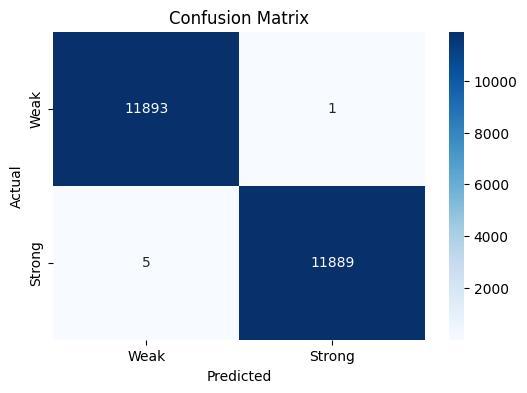

In [52]:
conf_matrix = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Weak", "Strong"], yticklabels=["Weak", "Strong"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
model.fit(X, y)
joblib.dump(model, "password_strength_Analyser_model.pkl")

['password_strength_Analyser_model.pkl']

In [54]:

# Load the trained model
model = joblib.load("password_strength_Analyser_model.pkl")

def predict_password_strength(password):
    # Extract features
    features = extract_features(password)
    features_df = pd.DataFrame([features])

    # Predict strength
    prediction = model.predict(features_df)[0]
    return "strong" if prediction == 1 else "weak"

# User input
user_password = input("Enter a password to check its strength: ")
strength = predict_password_strength(user_password)
print(f"The password strength is: {strength}")


Enter a password to check its strength: vo6;y<oN2529
The password strength is: strong
